<a href="https://colab.research.google.com/github/Hamza-Khan993/GRIP-at-The-Spark-Foundation/blob/master/Task_4_To_Explore_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

**For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as aplt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Data**

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

**X = Features 
y = Target**

In [6]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
y = data["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Spliiting Model into training and testing sets**

In [8]:
from sklearn.model_selection import train_test_split
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size= 0.3, random_state=3)

In [9]:
print("Test set:", test_X.shape,test_y.shape)
print("Train set:", train_X.shape,test_y.shape)

Test set: (45, 4) (45,)
Train set: (105, 4) (45,)


**Modeling**

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
IrisTree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
IrisTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Training**

In [26]:
IrisTree.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Prediction using Testing Set**

In [27]:
predTree = IrisTree.predict(test_X)

In [28]:
print(predTree[0:5])
print(test_y[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


**Evaluation**

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [30]:
print("Decision Tree Accuracy:", metrics.accuracy_score(predTree,test_y))

Decision Tree Accuracy: 0.9555555555555556


**Visualizing the Decision Tree**

In [18]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


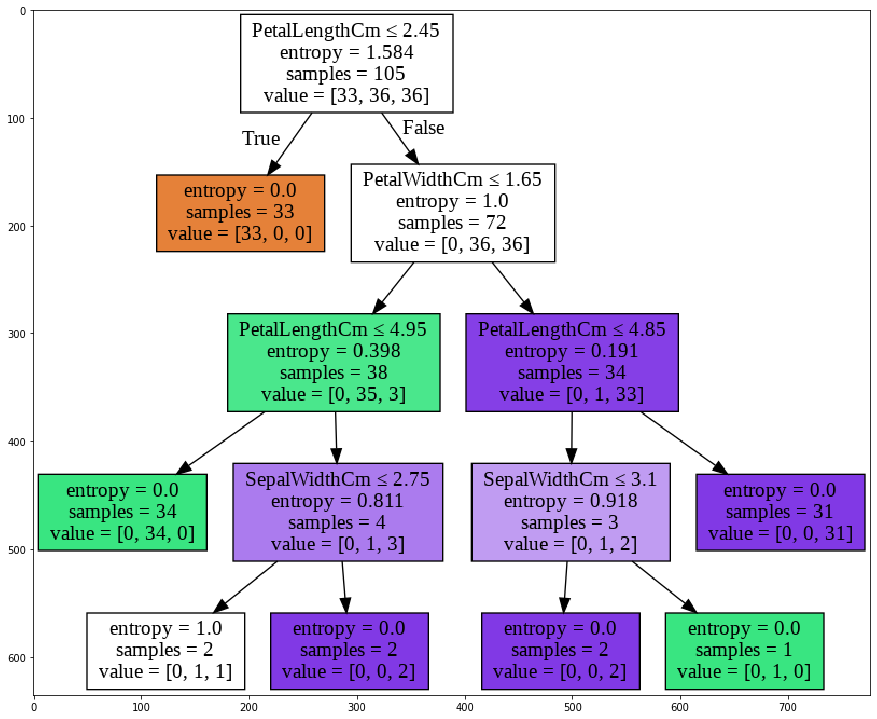

In [37]:
dot_data = StringIO()
filename = "Iristree.png"
featureNames = data.columns[1:5]
targetNames = data["Species"].unique().tolist()
out = tree.export_graphviz(IrisTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 30))
plt.imshow(img,interpolation='nearest')

**Using our model to predict values for unknown data**

In [39]:
sample_data = [[5.6, 3, 2.4, 2.4],
               [5.9, 3.7 , 1.8, 0.2],
               [6.7, 4, 2.5, 2.3],
               [4.6, 3.1, 5.1, 2.0],
               [5. , 3.8, 2.4, 1.2]]

In [40]:
predTreeforsampledata = IrisTree.predict(sample_data)

In [41]:
predTreeforsampledata

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

#**Thank You**